In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Step 1: Data Collection
# Assuming you have a CSV file with air quality data
data = pd.read_csv('cpcb_dly_aq_tamil_nadu-2014.csv')

# Step 2: Data Preprocessing
# Handle missing values, remove duplicates, and clean the data

# Step 3: Data Exploration and Visualization
# Use libraries like Matplotlib, Seaborn, or Plotly to create visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Time series plot of RSPM/PM10 levels
plt.figure(figsize=(12, 6))
sns.lineplot(x='Sampling Date', y='RSPM/PM10', data=data)
plt.title('Time Series of RSPM/PM10 Levels')
plt.xlabel('Date')
plt.ylabel('RSPM/PM10')
plt.show()

# Step 4: Feature Engineering
# Create new features or transform existing ones
# Assuming you want to use SO2 and NO2 as features
data['SO2/NO2 Ratio'] = data['SO2'] / data['NO2']

# Step 5: Data Splitting
X = data[['SO2', 'NO2']]
y = data['RSPM/PM10']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Model Development
# Using a simple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 7: Model Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Step 8: Predicting Air Quality
# You can now use the trained model to make predictions
# For example, if you have new SO2 and NO2 values
new_data = pd.DataFrame({'SO2': [10.5], 'NO2': [25.3]})
predicted_pm10 = model.predict(new_data)
print(f'Predicted RSPM/PM10: {predicted_pm10[0]}')


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
data = pd.read_csv('cpcb_dly_aq_tamil_nadu-2014.csv')
data.head()

,Stn Code,Sampling Date,State,City/Town/Village/Area,Location of Monitoring Station,Agency,Type of Location,SO2,NO2,RSPM/PM10,PM 2.5
0,38,01-02-14,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,11.0,17.0,55.0,NaN
1,38,01-07-14,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,13.0,17.0,45.0,NaN
2,38,21-01-14,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,12.0,18.0,50.0,NaN
3,38,23-01-14,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,15.0,16.0,46.0,NaN
4,38,28-01-14,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,13.0,14.0,42.0,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2879 entries, 0 to 2878
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Stn Code                        2879 non-null   int64  
 1   Sampling Date                   2879 non-null   object 
 2   State                           2879 non-null   object 
 3   City/Town/Village/Area          2879 non-null   object 
 4   Location of Monitoring Station  2879 non-null   object 
 5   Agency                          2879 non-null   object 
 6   Type of Location                2879 non-null   object 
 7   SO2                             2868 non-null   float64
 8   NO2                             2866 non-null   float64
 9   RSPM/PM10                       2875 non-null   float64
 10  PM 2.5                          0 non-null      float64
dtypes: float64(4), int64(1), object(6)
memory usage: 247.5+ KB


In [ ]:
data.isnull().sum()

Stn Code                             0
Sampling Date                        0
State                                0
City/Town/Village/Area               0
Location of Monitoring Station       0
Agency                               0
Type of Location                     0
SO2                                 11
NO2                                 13
RSPM/PM10                            4
PM 2.5                            2879
dtype: int64

In [ ]:
mean_so2 = data['SO2'].mean
data['SO2'] = data['SO2'].fillna(mean_so2)

In [ ]:
mean_no2 = data['NO2'].mean
data['NO2'] = data['NO2'].fillna(mean_no2)

In [ ]:
mean_RSPM = data['RSPM/PM10'].mean
data['RSPM/PM10'] = data['RSPM/PM10'].fillna(mean_RSPM)

In [ ]:
data.head()

,Stn Code,Sampling Date,State,City/Town/Village/Area,Location of Monitoring Station,Agency,Type of Location,SO2,NO2,RSPM/PM10,PM 2.5
0,38,01-02-14,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,11.0,17.0,55.0,NaN
1,38,01-07-14,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,13.0,17.0,45.0,NaN
2,38,21-01-14,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,12.0,18.0,50.0,NaN
3,38,23-01-14,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,15.0,16.0,46.0,NaN
4,38,28-01-14,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,13.0,14.0,42.0,NaN


In [ ]:
data.isnull().sum()

Stn Code                             0
Sampling Date                        0
State                                0
City/Town/Village/Area               0
Location of Monitoring Station       0
Agency                               0
Type of Location                     0
SO2                                  0
NO2                                  0
RSPM/PM10                            0
PM 2.5                            2879
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2879 entries, 0 to 2878
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Stn Code                        2879 non-null   int64  
 1   Sampling Date                   2879 non-null   object 
 2   State                           2879 non-null   object 
 3   City/Town/Village/Area          2879 non-null   object 
 4   Location of Monitoring Station  2879 non-null   object 
 5   Agency                          2879 non-null   object 
 6   Type of Location                2879 non-null   object 
 7   SO2                             2879 non-null   object 
 8   NO2                             2879 non-null   object 
 9   RSPM/PM10                       2879 non-null   object 
 10  PM 2.5                          0 non-null      float64
dtypes: float64(1), int64(1), object(9)
memory usage: 247.5+ KB


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

# Load the data into a DataFrame
data = pd.read_csv('cpcb_dly_aq_tamil_nadu-2014.csv')

# Calculate the mean values for SO2 and NO2
mean_so2 = data['SO2'].mean()
mean_no2 = data['NO2'].mean()

# Fill missing values with the mean values
data['SO2'] = data['SO2'].fillna(mean_so2)
data['NO2'] = data['NO2'].fillna(mean_no2)

# Replace non-finite values (e.g., NaN) with a specific value (e.g., 0)
data = data.replace([np.inf, -np.inf], np.nan).fillna(0)

# Convert the input features (SO2 and NO2) to integers
X = data[['SO2', 'NO2']].astype(int)

# Convert the output feature (RSPM/PM10) to integers
y = data['RSPM/PM10'].astype(int)

# Split the data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing dataset
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)


Mean Squared Error: 856.3214147174313


Mean Squared Error: 817.1703588508956


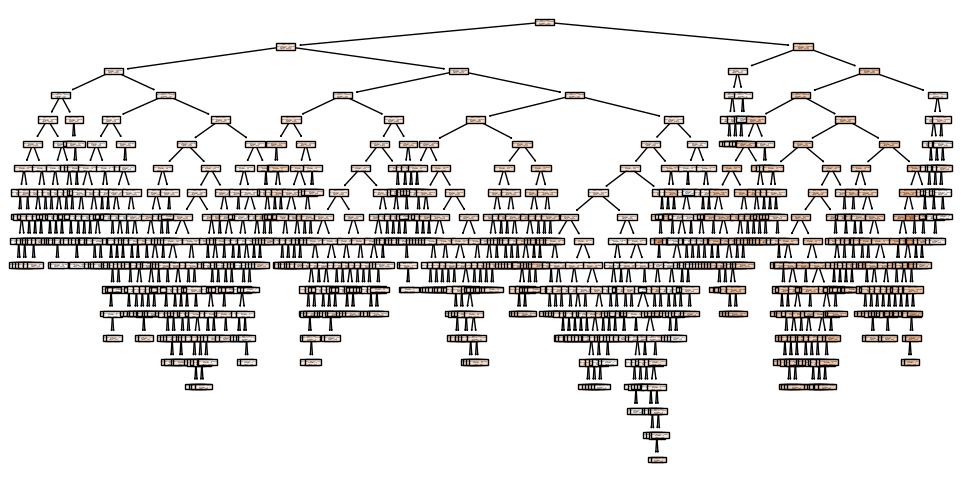

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load your dataset into a DataFrame
data = pd.read_csv('cpcb_dly_aq_tamil_nadu-2014.csv')
# Calculate the mean values for SO2 and NO2
mean_so2 = data['SO2'].median()
mean_no2 = data['NO2'].median()

# Fill missing values with the mean values
data['SO2'] = data['SO2'].fillna(mean_so2)
data['NO2'] = data['NO2'].fillna(mean_no2)

# Replace non-finite values (e.g., NaN) with a specific value (e.g., 0)
data = data.replace([np.inf, -np.inf], np.nan).fillna(0)
# Select the features (X) and target variable (y)
X = data[['SO2', 'NO2']]
y = data['RSPM/PM10']

# Split the data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)


from sklearn.tree import plot_tree
plt.figure(figsize=(12, 6))
plot_tree(model, filled=True, feature_names=X.columns)
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load your dataset into a DataFrame
data = pd.read_csv('cpcb_dly_aq_tamil_nadu-2014.csv')
mean_so2 = data['SO2'].median()
mean_no2 = data['NO2'].median()

# Fill missing values with the mean values
data['SO2'] = data['SO2'].fillna(mean_so2)
data['NO2'] = data['NO2'].fillna(mean_no2)

# Replace non-finite values (e.g., NaN) with a specific value (e.g., 0)
data = data.replace([np.inf, -np.inf], np.nan).fillna(0)
# Select the features (X) and target variable (y)
X = data[['SO2', 'NO2']]
y = data['RSPM/PM10']

# Split the data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing dataset
y_pred = model.predict(X_test)

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)


Mean Squared Error: 786.4471548838288
